In [398]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import math

In [359]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats
from datetime import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [281]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import cast, Date

In [282]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [283]:
# reflect an existing database into a new model

Base = automap_base()
Base.prepare(engine, reflect=True)

In [284]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [285]:
# Save references to each table

Measurements = Base.classes.measurement
Stations = Base.classes.station

In [286]:
# View columns in Measurements
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [287]:
# View columns in Stations
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [288]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [289]:
# Find the most recent date in the data set.

most_recent_date = session.query(Measurements).order_by(Measurements.date.desc()).first()

print(f"Most recent date in the data set is {most_recent_date.date}")


Most recent date in the data set is 2017-08-23


In [393]:
# Design a query to retrieve the last 12 months of precipitation data

stmt = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date > '2016-08-23').order_by(Measurements.date.desc()).statement

precipitation_df = pd.read_sql_query(stmt, session.bind)

average_prcp_df = precipitation_df.groupby(['date']).mean()

#average_prcp_df['prcp'] = average_prcp_df['prcp'].map('{:,.2f}'.format)

average_prcp_df.index.names = ['Date']

average_prcp_df = average_prcp_df.rename(columns={'prcp': 'Precipitation in CM'})

average_prcp_df.head()


,Precipitation in CM
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


In [312]:
# Use Pandas to calcualte the summary statistics for the precipitation data

#average_prcp_df.describe()

precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


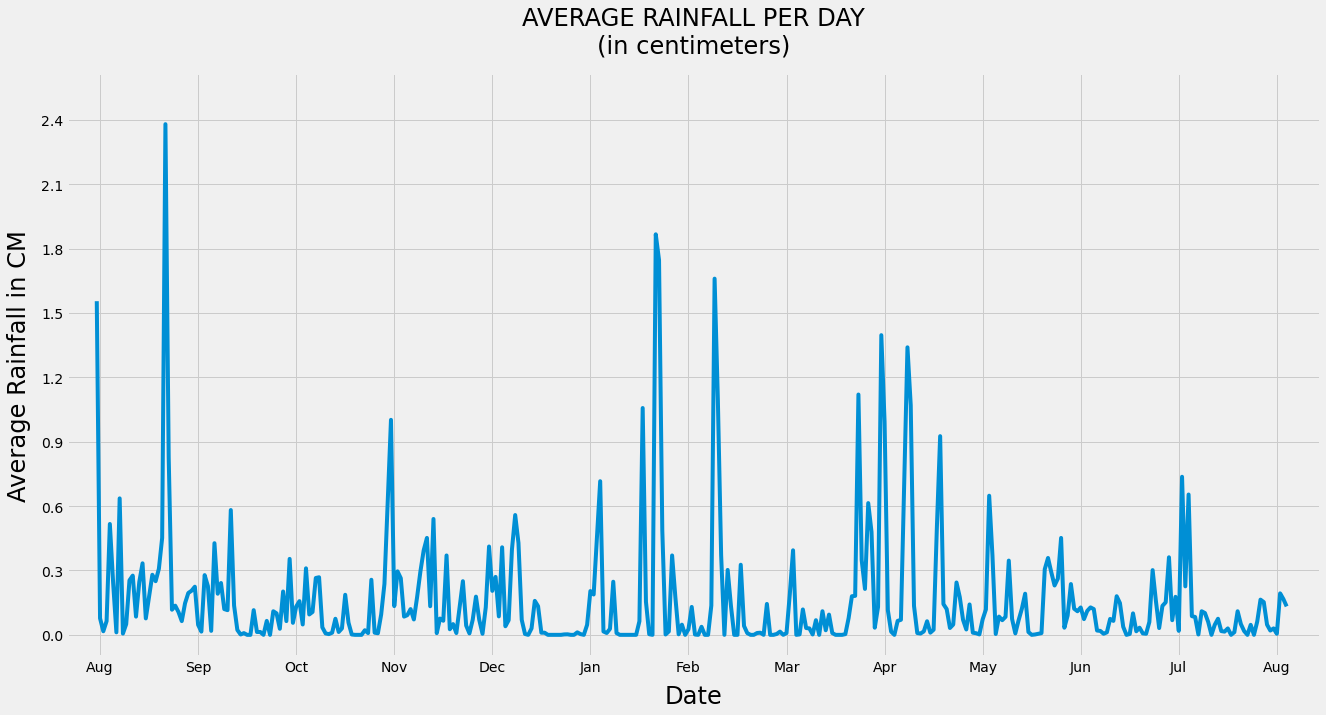

In [421]:
#Plot the average precipitation results. 

plt.figure(num=None, figsize=(20,10), dpi=None, 
                         facecolor=None, edgecolor=None, frameon=True)
x_axis = average_prcp_df.index
y_axis = average_prcp_df['Precipitation in CM']
l = len(average_prcp_df)

prcp_range = max(y_axis)-min(y_axis)

x_tx = [tk_x for tk_x in range(1, (l)+1, int(l/12))]
y_tx = [round(tk_y,2) for tk_y in np.arange(0, math.ceil(prcp_range), math.ceil(prcp_range)/10)]

labels=[dt.strptime(x_axis[tk], '%Y-%m-%d').strftime("%b") for tk in tx]
    
plt.xticks(ticks=x_tx, labels=labels)
plt.yticks(ticks=y_tx)
plt.plot(x_axis, y_axis)

plt.xlim(-len(x_axis)*.025, len(x_axis)*1.025)
plt.ylim(-.1, max(y_axis)*1.1)

plt.title("AVERAGE RAINFALL PER DAY\n(in centimeters)", fontsize='xx-large',             # Set up title
          loc='center', pad=20)
plt.xlabel("Date", fontsize='xx-large', labelpad=10)
plt.ylabel("Average Rainfall in CM", fontsize='xx-large', labelpad=10)
plt.show()

# Exploratory Station Analysis

In [297]:
# Design a query to calculate the total number stations in the dataset
stations_count = session.query(Stations.station.distinct()).count()
print(f"Total number of weather stations in the dataset: {stations_count}")

Total number of weather stations in the dataset: 9


In [315]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

stmt = session.query(Measurements.station, func.count(Measurements.station)).\
    group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).statement

most_active_stations = pd.read_sql_query(stmt, session.bind)

most_active_stations = most_active_stations.\
    rename(columns={'station' : 'Station', 'count_1': '# of Measurements'})

most_active_stations

,Station,# of Measurements
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()